In [ ]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def get_cosine(vec1, vec2):
     intersection = set(vec1.keys()) & set(vec2.keys())
     numerator = sum([vec1[x] * vec2[x] for x in intersection])

     sum1 = sum([vec1[x]**2 for x in vec1.keys()])
     sum2 = sum([vec2[x]**2 for x in vec2.keys()])
     denominator = math.sqrt(sum1) * math.sqrt(sum2)

     if not denominator:
        return 0.0
     else:
        return float(numerator) / denominator

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

text1 = 'This is a foo bar sentence .'
text2 = 'This sentence is similar to a foo bar sentence .'

vector1 = text_to_vector(text1)
vector2 = text_to_vector(text2)

cosine = get_cosine(vector1, vector2)

print('Cosine:', cosine)

In [ ]:
pip install tweepy

In [ ]:
import os
import pandas as pd
import tweepy as tw


In [ ]:
pip install python-twitter --user

In [ ]:
import twitter

In [ ]:
api = twitter.Api(consumer_key='5QUCmsZc97JKVhSW7UqB4PmGO',
                      consumer_secret='Szv1qILgFywnl1IbLakJDIqbt44unJOXWEWY7iZ2ksw6WZvDjx',
                      access_token_key='1159073576495923200-s1eAfxDF86zf9J7brJoe2CEFwU0UW0',
                      access_token_secret='sxA356gk2uPJFU5iIyoB2yKLUrAbnvZpSGV9cRtqzEWb7')

In [ ]:
users = api.GetFriends()
print([u.name for u in users])
timel=api.GetHomeTimeline()
tie2=api.GetUserTimeline(screen_name="MMitanshu")
for ti in tie2:
    print(ti)

In [ ]:
results = api.GetSearch(
    raw_query="q=twitter%20&result_type=recent&since=2014-07-19&count=100")
for res in results:
    print(res)

In [ ]:
results = api.GetSearch(raw_query="q=shiny pants&result_type=recent&since=2014-07-19",result_type='mixed')
for res in results:
    print(res)

In [ ]:
pip install beautifulsoup4

In [ ]:
from requests import get
url = 'https://twitter.com/search?q=shiny%20pants&src=typed_query'
response = get(url)
print(response.text)
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')

In [ ]:
movie_containers = html_soup.find_all('div')
print(type(movie_containers))
print(len(movie_containers))
for m in movie_containers:
    print(m)

In [ ]:
pip install -U selenium --user

In [ ]:
#tweet_mode used to get full text inplace of truncated
results = api.GetSearch(
    raw_query="q=holi%20&tweet_mode=extended",include_entities=True,result_type='recent')
for res in results:
    print(res)

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
#from selenium.common.exceptions import TimeOutException, NoSuchElementException
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
from bs4 import BeautifulSoup

import time
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
import csv
import json
import logging

# path where the selenium driver is copied.
#for lab pc ashish
#driver_path = '/home/ashishranjan/chromedriver'
#for home pc ashish
# driver_path = '/home/ashish/Downloads/chromedriver'
#for lab pc anurag
# driver_path = '/home/anurag.barfa/mywork/btp/chromedriver'
#for home pc anurag
driver_path = '/home/anurag/Work/btp/BTP/chromedriver'
# This will open a new chrome session.

chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument("--disable-notifications")
driver = webdriver.Chrome(executable_path = driver_path,options=chrome_options)
#driver.get("https://twitter.com/search?q=delhi%20election&src=typed_query")
query="kohli"
driver.get("https://twitter.com/search?q="+query+"&src=typed_query")

SCROLL_PAUSE_TIME = 10

# Get scroll height
last_height = driver.execute_script("return document.body.scrollHeight")
scroll_count=30 #number of times you want to scroll the page
tweet_boxes=[]
while True:
    # Scroll down to bottom
    driver.execute_script("window.scrollTo(0, document.body.scrollHeight);")

    # Wait to load page
    time.sleep(SCROLL_PAUSE_TIME)

    # Calculate new scroll height and compare with last scroll height
    new_height = driver.execute_script("return document.body.scrollHeight")
    if new_height == last_height:
        break
    last_height = new_height
    tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
    tutorial_code_soup = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
    tweet = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
    tweet_boxes=tweet_boxes+tweet
    scroll_count=scroll_count-1
    if scroll_count==0:
        break
            
#tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
# tutorial_code_soup1 = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2'})
# for tweet in tutorial_code_soup1:
#     print(tweet)
# # tutorial_code_soup2 = tutorial_soup.find_all('ol',attrs={'id':'stream-items-id'})
# tutorial_code_soup2 = tutorial_soup.find_all('li',attrs={'class':'js-stream-item stream-item stream-item'})
# for tweet in tutorial_code_soup2:
#     print(tweet)

In [ ]:
tweetstemp=[]
 
for i in tweet_boxes:
    # Add to the new list
    # only if not present
    if i not in tweetstemp:
        tweetstemp.append(i)
tweet_boxes = tweetstemp
len(tweet_boxes)

In [ ]:
def cleanText(text):
    

In [ ]:
import re, math
from collections import Counter

WORD = re.compile(r'\w+')

def text_to_vector(text):
     words = WORD.findall(text)
     return Counter(words)

def cosine(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
#     print(intersection)
    numerator = sum([vec1[x] * vec2[x] for x in intersection])
    sum1 = sum([vec1[x]**2 for x in vec1.keys()])
    sum2 = sum([vec2[x]**2 for x in vec2.keys()])
    denominator = math.sqrt(sum1) * math.sqrt(sum2)
    if not denominator:
        return 0.0
    else:
        return float(numerator) / denominator

def jaccard(tweet,query):
    vec1 = text_to_vector(tweet.lower())
    vec2 = text_to_vector(query.lower())
    intersection = set(vec1.keys()) & set(vec2.keys())
    union =set(vec1.keys()) | set(vec2.keys())

In [ ]:
def gettweet(box,query):
    tweet=box.findChildren('div',recursive=False)[1].text
    user=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[0].text
    date=box.findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren('div',recursive=False)[0].findChildren(recursive=False)[2].attrs['title']
    likes = comments = retweet = 'None'
    span = box.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
    likes = span[3].text
    retweet = span[2].text
    comments = span[1].text
    tags=[]
    mentions=[]
    urls=0
    for anchor in box.find_all('a'):
        #print(anchor.text+"######")
        if 'href' in anchor.attrs:
            if anchor.attrs['href'].split('/')[1]=='hashtag':
                tags.append(anchor.text)
            if anchor.attrs['href'].split(':')[0]=='https':
                urls=urls+1
        if len(anchor.text)>0 and anchor.text[0]=='@':
            mentions.append(anchor.text)
        
    #print(tags)
    #print(mentions)
    cosine_similarity=cosine(tweet,query)*100
    multimedia_flag=0
    s = str(box.find('img'))
    if ((box.find('img') and s.find('format')!=-1 )  or box.find('video')):
        multimedia_flag=1  
    return tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity

In [ ]:
import csv
with open('data/sample_'+query+'.csv', mode='w') as sample:
    sample_writer = csv.writer(sample, delimiter=',')
    sample_writer.writerow(['Query','Date','user','Tweet','Img_present','Likes','commnets','retweet','tags','mentions','url_count','length','cosine_similarity(%)'])
    for boxes in tweet_boxes:
        tweet,likes,comments,retweet,user,date,tags,mentions,multimedia_flag,urls,cosine_similarity = gettweet(boxes,query)
        sample_writer.writerow([query,date, user, tweet, multimedia_flag,likes,comments,retweet,",".join(tags),",".join(mentions),urls,len(tweet),cosine_similarity])

In [ ]:
pip install chainer==1.17.0

In [1]:
# encoding: utf-8 
query='kohli'
import csv
import matplotlib.pyplot as plt
data=[] 
training_X=[]
training_Y=[]
with open('data/'+query+'.csv', mode='r',encoding='utf-8') as sample:
    sample_reader = csv.reader(sample, delimiter=',')
    title=['rank']
    for rank,row in enumerate(sample_reader):
        if rank==0:
            title=title+row
            data=[[] for x in title]
        else:
            data[0].append(rank)
            training_Y.append(rank)
            for i in range(0,len(row)):
                data[i+1].append(row[i])
            training_X.append([int(row[3]), int(row[4]), int(row[5]), int(row[6]), int(row[9]), int(row[10]), int(row[11]), int(row[12]), int(row[15]), int(row[16])])
print(title) 
print(type(training_X))

['rank', 'Query', 'username', 'created_at', 'verified', 'followers_count', 'friends_count', 'listed_count', 'tweet', 'date', 'Img_present', 'likes', 'comments', 'retweets', 'tags', 'mentions', 'sum_followers_mention', 'url_count']
<class 'list'>


In [2]:
import numpy as np
X = np.array(training_X)
y = np.array(training_Y)

In [ ]:
# X = np.random.rand(50,50)
# y = np.random.rand(50,1)

In [3]:
from learning2rank.rank import ListNet
Model = ListNet.ListNet()

load dataset
The number of data, train: 217 validate: 12
prepare initialized model!
Start training and validation loop......
epoch 1


  0%|                                                                                            | 0/5 [00:00<?, ?it/s]C:\ProgramData\Anaconda3\lib\site-packages\chainer\functions\math\exponential.py:47: RuntimeWarning: invalid value encountered in log
  return utils.force_array(numpy.log(x[0])),
C:\Users\Ashish Ranjan\BTP\learning2rank\rank\ListNet.py:63: RuntimeWarning: invalid value encountered in greater
  ind = vec_true.data * vec_compare.data > 0
C:\ProgramData\Anaconda3\lib\site-packages\chainer\functions\activation\relu.py:43: RuntimeWarning: invalid value encountered in greater
  return utils.force_array(gy[0] * (x[0] > 0)),
100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 79.58it/s]


train mean loss=-109676.71370967742


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.69it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 172.88it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 252.59it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 135.50it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.09it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 161.79it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.05it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 192.82it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 334.18it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 238.73it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.08it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 161.72it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.71it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 167.10it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.08it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 151.93it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 125.15it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 106.67it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 167.08it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 147.43it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 143.22it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 135.51it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.46it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 147.45it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 166.54it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 147.45it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 143.90it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 179.04it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.74it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 98.30it/s]


train mean loss=0.0


100%|████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 90.80it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 143.24it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 335.33it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 147.47it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 250.63it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 131.93it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.57it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

100%|███████████████████████████████████████████████████████████████████████████████████| 5/5 [00:00<00:00, 263.85it/s]


train mean loss=0.0


100%|███████████████████████████████████████████████████████████████████████████████████| 1/1 [00:00<00:00, 200.24it/s]


test  mean loss=0.0
[[0.0000000e+00 3.0000000e+00 1.9000000e+01 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 6.8000000e+01 6.7000000e+01 ... 1.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 1.0100000e+02 3.0000000e+01 ... 5.0000000e+00
  3.3856640e+07 0.0000000e+00]
 ...
 [0.0000000e+00 7.5700000e+02 2.9000000e+01 ... 6.8000000e+01
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 5.5300000e+02 3.3600000e+02 ... 4.0000000e+01
  3.3856644e+07 0.0000000e+00]
 [0.0000000e+00 3.8000000e+02 5.8000000e+01 ... 9.0000000e+00
  3.3856640e+07 0.0000000e+00]]
[[nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 ...
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]
 [nan nan nan ... nan nan nan]]
[[1.0000000e+00 3.3856644e+07 5.8000000e+01 8.0160000e+03 0.0000000e+00
  1.3030000e+05 1.8000000e+03 9.7000000e+03 6.9638780e+06 0.0000000e+00]
 [0.0000000e+00 7.1300000e+02 1.7600000e+02 0.0000000e+00 0.0000000e+00
  5.800

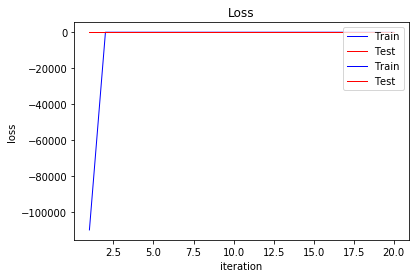

In [4]:
Model.fit(X, y)

In [ ]:
Model.predict(X)

In [ ]:
# for i in range(0,len(data[4])):
#     data[4][i]=convertToNumber(data[4][i])
# for i in range(0,len(data[5])):
#     data[5][i]=convertToNumber(data[5][i])
# for i in range(0,len(data[6])):
#     data[6][i]=convertToNumber(data[6][i])
# for i in range(0,len(data[7])):
#     data[7][i]=convertToNumber(data[7][i])
# for i in range(0,len(data[10])):
#     data[10][i]=convertToNumber(data[10][i])
# for i in range(0,len(data[11])):
#     data[11][i]=convertToNumber(data[11][i])
# for i in range(0,len(data[12])):
#     data[12][i]=convertToNumber(data[12][i])
# for i in range(0,len(data[13])):
#     data[13][i]=convertToNumber(data[13][i])
# for i in range(0,len(data[16])):
#     data[16][i]=convertToNumber(data[16][i])
# for i in range(0,len(data[17])):
#     data[17][i]=convertToNumber(data[17][i])
# plt.plot(data[0], data[4])
plt.plot(data[0], data[5])
plt.plot(data[0], data[6])
plt.plot(data[0], data[7])
plt.plot(data[0], data[10])
plt.plot(data[0], data[11])
plt.plot(data[0], data[12])
plt.plot(data[0], data[13])
plt.plot(data[0], data[16])
plt.plot(data[0], data[17])

In [ ]:
tutorial_soup = BeautifulSoup(driver.page_source, 'html.parser')
#tweet_boxes = tutorial_soup.find_all('div',attrs={'class':'css-1dbjc4n r-18u37iz r-thb0q2','data-testid':'tweet'})
tweet_boxes = tutorial_soup.find_all('div',{'class':'css-1dbjc4n r-1iusvr4 r-16y2uox r-1777fci r-5f2r5o r-1mi0q7o'})
len(tweet_boxes)
tweet_boxes[1].findChildren('div',recursive=False)[3].attrs.get('aria-label')
for i in range(0,len(tweet_boxes)):
    print(tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label'))
#     tweet_boxes[i].findChildren('div',recursive=False)[3].attrs.get('aria-label')
box = tweet_boxes[2]
#small_boxes = box.find_all('div',{'class':'css-901oao r-hkyrab r-1qd0xha r-a023e6 r-16dba41 r-ad9z0x r-bcqeeo r-bnwqim r-qvutc0','lang':'en'})
if(box.find('img')):
    small_boxes = box.find('img')
    print(small_boxes)
boxes = tweet_boxes[2]
#boxes.text
#span = boxes.find_all('span',{'class':'css-901oao css-16my406 r-1qd0xha r-ad9z0x r-bcqeeo r-qvutc0'})
span = boxes.find_all('div',{'class':'css-901oao r-1awozwy r-1re7ezh r-6koalj r-1qd0xha r-a023e6 r-16dba41 r-1h0z5md r-ad9z0x r-bcqeeo r-o7ynqc r-clp7b1 r-3s2u2q r-qvutc0'})
span[4].text
#span[len(span)-1].text.isdigit()<div dir="ltr" class="">

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(C=1e5)

In [ ]:
logreg.fit(training_X, training_Y)

In [ ]:
import random
# random.shuffle(training_X)
logreg.predict(training_X)